## 0 環境構築

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
np.set_printoptions(precision=8)
np.random.seed(123)

In [2]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=0ba5dd3b427eaaf85962a471e570a759864292a5ff9fb449e4d2a3c70114147f
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [3]:
import japanize_matplotlib
import matplotlib as mpl
font = mpl.rcParams['font.family']
sns.set(context='notebook', style='whitegrid', font=font)

## 1 国内感染者数の推移

In [4]:
!wget https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv

--2022-06-05 01:07:39--  https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv
Resolving www3.nhk.or.jp (www3.nhk.or.jp)... 23.220.140.160
Connecting to www3.nhk.or.jp (www3.nhk.or.jp)|23.220.140.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26350 (26K) [application/x-excel]
Saving to: ‘nhk_news_covid19_domestic_daily_data.csv’

nhk_news_covid19_do 100%[===================>]  25.73K  --.-KB/s    in 0.02s   

2022-06-05 01:07:40 (1.28 MB/s) - ‘nhk_news_covid19_domestic_daily_data.csv’ saved [26350/26350]



In [5]:
# df_nhk = pd.read_csv("https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
# df_nhk.head()

In [6]:
df_nhk = pd.read_csv("nhk_news_covid19_domestic_daily_data.csv", delimiter=",", header=0, index_col='日付', parse_dates=True)
df_nhk.tail()

,国内の感染者数_1日ごとの発表数,国内の感染者数_累計,国内の死者数_1日ごとの発表数,国内の死者数_累計
日付,,,,
2022-05-31,22018,8853144,39,30622
2022-06-01,22765,8875909,36,30658
2022-06-02,20679,8896588,24,30682
2022-06-03,19270,8915858,32,30714
2022-06-04,18252,8934110,23,30737


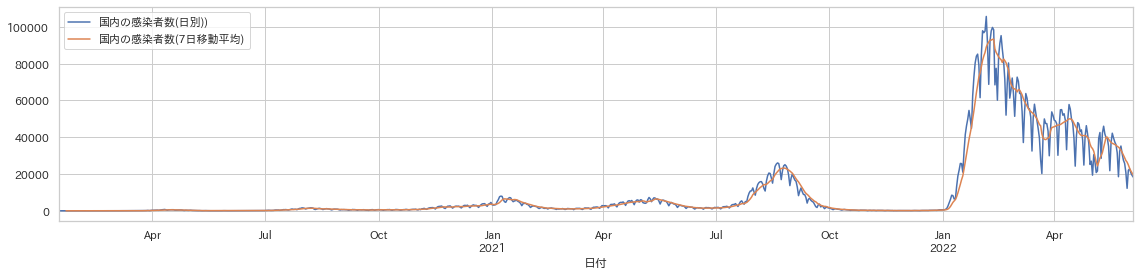

In [7]:
df_nhk['国内の感染者数_1日ごとの発表数'].plot(figsize=(16, 4), grid=True, legend=True, label="国内の感染者数(日別))")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(figsize=(16, 4), grid=True, legend=True, label="国内の感染者数(7日移動平均)")
plt.tight_layout()

## 2 ダウンロード

### (0) rakuten-all

In [8]:
# FILE_ID = "17oGj-xqA289WToOim2adgdqKcMJCfMq4"
# FILE_NAME = "rakuten-all.tsv.zip"
# # !curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}"
# # CODE = !awk '/_warning_/ {print $NF}' ./cookie
# # !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

# !curl -L "https://docs.google.com/uc?export=download&id={FILE_ID}" > {FILE_NAME}

In [9]:
FILE_ID = "17oGj-xqA289WToOim2adgdqKcMJCfMq4"
!gdown --id {FILE_ID}

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17oGj-xqA289WToOim2adgdqKcMJCfMq4
To: /content/rakuten-all.tsv.zip
100% 203M/203M [00:01<00:00, 150MB/s]


In [10]:
!unzip rakuten-all.tsv.zip
!wc -l *.tsv

Archive:  rakuten-all.tsv.zip
  inflating: rakuten-all.tsv         
1593526 rakuten-all.tsv


In [11]:
!head -n +4 rakuten-all.tsv

カテゴリー	エリア	施設番号	施設名	コメント	総合	サービス	立地	部屋	設備・アメニティ	風呂	食事	旅行の目的	同伴者	宿泊年月	投稿者	年代	性別	投稿回数
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	1年前に宿泊して良かったので、今回もお世話になりました。食事が良かったです。従業員の方の愛想も良く、また利用したいと思います。	5	4	5	5	4	3	5	その他	友達	2016年02月	Z01	30代	男性	na
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	21:30頃に夕食をとれる場所を探しに外出したが、ホテルでくれた地図（10分以上かかるところが多い）にのっていない喫茶店が近くにあることがわかった。食事が不便なので案内を充実してほしい。	3	3	3	3	3	3	-	レジャー	一人	2015年05月	投稿者	na	na	na
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	7月28日から２泊の予約をしましたが、１泊で用事が終わり帰ってきました。全体として古い施設ですが掃除が行き届いており清潔です。予約時に空調を確認せず扇風機だけでしたので夏は暑いと思われたほうがよいです。（１泊で帰った原因です。暑いのは苦手なので２泊は無理でした。）ホテルの方の対応は親切、丁寧でした。また、お風呂は１つしかないので女性が入浴されるときはこちらで時間指定をさせていただき女性専用として対応していただきました。朝食はごはんのおかわり自由ですし、おかずの量も朝食としては十分かなと思います。お値段相応と思っていただければと思います。	4	5	3	4	3	3	4	レジャー	家族	2015年07月	投稿者	na	na	na


In [12]:
df_all = pd.read_csv("rakuten-all.tsv", sep='\t', quoting=3, escapechar='\\')
print(df_all.shape)
df_all.head()

(1593525, 19)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,風呂,食事,旅行の目的,同伴者,宿泊年月,投稿者,年代,性別,投稿回数
0,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,1年前に宿泊して良かったので、今回もお世話になりました。食事が良かったです。従業員の方の愛想...,5,4,5,5,4,3,5,その他,友達,2016年02月,Z01,30代,男性,na
1,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,21:30頃に夕食をとれる場所を探しに外出したが、ホテルでくれた地図（10分以上かかるところ...,3,3,3,3,3,3,-,レジャー,一人,2015年05月,投稿者,na,na,na
2,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,7月28日から２泊の予約をしましたが、１泊で用事が終わり帰ってきました。全体として古い施設で...,4,5,3,4,3,3,4,レジャー,家族,2015年07月,投稿者,na,na,na
3,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,"出張で当日20時位に予約。1泊素泊まりで4,200円は安価。トイレ、風呂は共同と知らず宿泊で...",3,3,3,2,3,3,-,ビジネス,一人,2017年11月,ヒラちゃん777,50代,男性,na
4,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,駅から徒歩5分弱で、朝の1番列車を利用するのに、とても便利でした。フロントの女性がとても感じ...,4,4,5,3,3,4,4,レジャー,一人,2011年06月,投稿者,na,na,na


In [13]:
df_with_date = df_all[df_all['宿泊年月'] != 'na']
print(df_with_date.shape)
df_with_date.head()

(1147228, 19)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,風呂,食事,旅行の目的,同伴者,宿泊年月,投稿者,年代,性別,投稿回数
0,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,1年前に宿泊して良かったので、今回もお世話になりました。食事が良かったです。従業員の方の愛想...,5,4,5,5,4,3,5,その他,友達,2016年02月,Z01,30代,男性,na
1,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,21:30頃に夕食をとれる場所を探しに外出したが、ホテルでくれた地図（10分以上かかるところ...,3,3,3,3,3,3,-,レジャー,一人,2015年05月,投稿者,na,na,na
2,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,7月28日から２泊の予約をしましたが、１泊で用事が終わり帰ってきました。全体として古い施設で...,4,5,3,4,3,3,4,レジャー,家族,2015年07月,投稿者,na,na,na
3,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,"出張で当日20時位に予約。1泊素泊まりで4,200円は安価。トイレ、風呂は共同と知らず宿泊で...",3,3,3,2,3,3,-,ビジネス,一人,2017年11月,ヒラちゃん777,50代,男性,na
4,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,駅から徒歩5分弱で、朝の1番列車を利用するのに、とても便利でした。フロントの女性がとても感じ...,4,4,5,3,3,4,4,レジャー,一人,2011年06月,投稿者,na,na,na


In [14]:
df_with_date['宿泊年月'] = pd.to_datetime(df_with_date['宿泊年月'], format='%Y年%m月')
# df_with_date['index'] = df_with_date.index
# df_with_date.set_index('宿泊年月', inplace=True)
# df_with_date = df_with_date.tz_localize('Asia/Tokyo')
print(df_with_date.shape)
df_with_date.head()

(1147228, 19)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,風呂,食事,旅行の目的,同伴者,宿泊年月,投稿者,年代,性別,投稿回数
0,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,1年前に宿泊して良かったので、今回もお世話になりました。食事が良かったです。従業員の方の愛想...,5,4,5,5,4,3,5,その他,友達,2016-02-01,Z01,30代,男性,na
1,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,21:30頃に夕食をとれる場所を探しに外出したが、ホテルでくれた地図（10分以上かかるところ...,3,3,3,3,3,3,-,レジャー,一人,2015-05-01,投稿者,na,na,na
2,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,7月28日から２泊の予約をしましたが、１泊で用事が終わり帰ってきました。全体として古い施設で...,4,5,3,4,3,3,4,レジャー,家族,2015-07-01,投稿者,na,na,na
3,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,"出張で当日20時位に予約。1泊素泊まりで4,200円は安価。トイレ、風呂は共同と知らず宿泊で...",3,3,3,2,3,3,-,ビジネス,一人,2017-11-01,ヒラちゃん777,50代,男性,na
4,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,駅から徒歩5分弱で、朝の1番列車を利用するのに、とても便利でした。フロントの女性がとても感じ...,4,4,5,3,3,4,4,レジャー,一人,2011-06-01,投稿者,na,na,na


In [15]:
df_all = df_with_date[(df_with_date["宿泊年月"]>="2019-01-01")]
df_all['index'] = df_all.index
df_all.set_index('宿泊年月', inplace=True)
df_all = df_all.tz_localize('Asia/Tokyo')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 304888 entries, 2020-08-01 00:00:00+09:00 to 2021-05-01 00:00:00+09:00
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   カテゴリー     304888 non-null  object
 1   エリア       304888 non-null  object
 2   施設番号      304888 non-null  int64 
 3   施設名       304888 non-null  object
 4   コメント      304887 non-null  object
 5   総合        304888 non-null  object
 6   サービス      304888 non-null  object
 7   立地        304888 non-null  object
 8   部屋        304888 non-null  object
 9   設備・アメニティ  304888 non-null  object
 10  風呂        304888 non-null  object
 11  食事        304888 non-null  object
 12  旅行の目的     304888 non-null  object
 13  同伴者       304888 non-null  object
 14  投稿者       304888 non-null  object
 15  年代        304888 non-null  object
 16  性別        304888 non-null  object
 17  投稿回数      304888 non-null  object
 18  index     304888 non-null  int64 
dtypes: int64(2), object

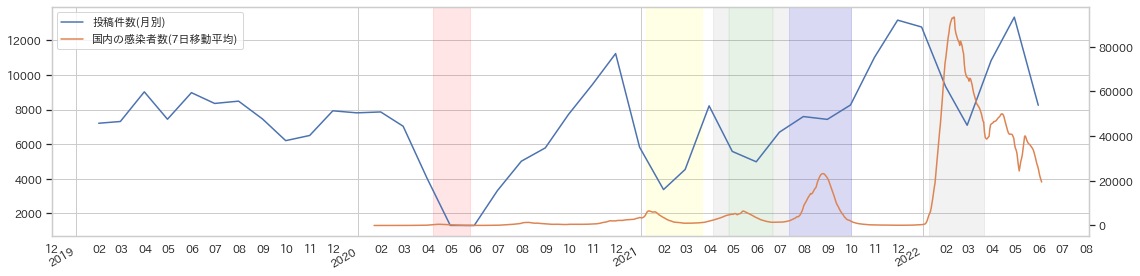

In [17]:
import datetime
import matplotlib.dates as mdates

fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(ax=ax2, grid=False, c='C1', legend=False, label="国内の感染者数(7日移動平均)", x_compat=True)

df_all['index'].resample('M').count().plot(ax=ax1, grid=True, c='C0', legend=True, label="投稿件数(月別)", x_compat=True)
ax1.axvspan(datetime.datetime(2020, 4,  7), datetime.datetime(2020, 5, 25), color="red",    alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 1,  8), datetime.datetime(2021, 3, 21), color="yellow", alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 4,  5), datetime.datetime(2021, 4, 24), color="gray",  alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 4, 25), datetime.datetime(2021, 6, 20), color="green", alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 6, 21), datetime.datetime(2021, 9, 30), color="gray",  alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 7, 12), datetime.datetime(2021, 9, 30), color="blue",  alpha=0.1)
ax1.axvspan(datetime.datetime(2022, 1,  9), datetime.datetime(2022, 3, 21), color="gray",  alpha=0.1)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, facecolor='white', loc='upper left')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%m"))
ax1.set_xlabel("")
plt.tight_layout()

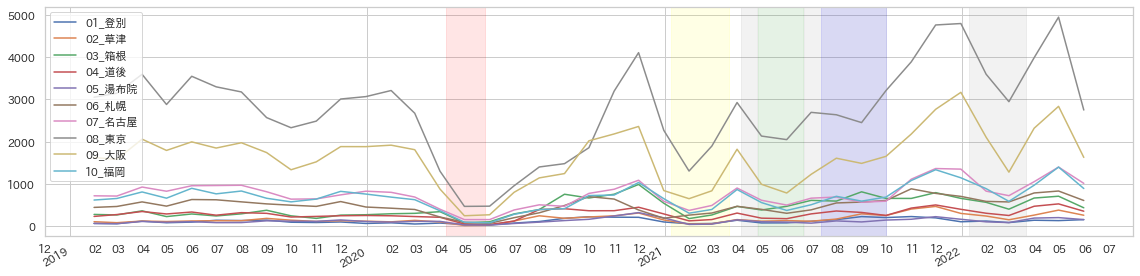

In [18]:
fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(111)

for idx, df in df_all.groupby(['エリア']):
  df['index'].resample('M').count().plot(grid=True, legend=True, label=idx, ax=ax1, x_compat=True)

ax1.axvspan(datetime.datetime(2020, 4,  7), datetime.datetime(2020, 5, 25), color="red",    alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 1,  8), datetime.datetime(2021, 3, 21), color="yellow", alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 4,  5), datetime.datetime(2021, 4, 24), color="gray",  alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 4, 25), datetime.datetime(2021, 6, 20), color="green", alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 6, 21), datetime.datetime(2021, 9, 30), color="gray",  alpha=0.1)
ax1.axvspan(datetime.datetime(2021, 7, 12), datetime.datetime(2021, 9, 30), color="blue",  alpha=0.1)
ax1.axvspan(datetime.datetime(2022, 1,  9), datetime.datetime(2022, 3, 21), color="gray",  alpha=0.1)
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax1.xaxis.set_minor_formatter(mdates.DateFormatter("%m"))
ax1.legend(facecolor='white', loc='upper left')
ax1.set_xlabel("")
plt.tight_layout()

### (1) rakuten-all-2021-2022

In [19]:
# FILE_ID = "1_yUCVULShe7YRWFmjh50WuYaMvi522VX"
# FILE_NAME = "rakuten-all-2021-2022.tsv.zip"
# # !curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}"
# # CODE = !awk '/_warning_/ {print $NF}' ./cookie
# # !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

# !curl -L "https://docs.google.com/uc?export=download&id={FILE_ID}" > {FILE_NAME}

In [20]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
FILE_ID = "1_yUCVULShe7YRWFmjh50WuYaMvi522VX"
!gdown --id {FILE_ID}

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_yUCVULShe7YRWFmjh50WuYaMvi522VX
To: /content/rakuten-all-2021-2022.tsv.zip
100% 17.9M/17.9M [00:00<00:00, 184MB/s]


### (2) rakuten-all-2019-2020

In [22]:
# FILE_ID = "1bC-3PwmZXo4-DXNCNAmSYywYMI2JhzlS"
# FILE_NAME = "rakuten-all-2019-2020.tsv.zip"
# # !curl -sc ./cookie "https://drive.google.com/uc?export=download&id={FILE_ID}"
# # CODE = !awk '/_warning_/ {print $NF}' ./cookie
# # !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={CODE[0]}&id={FILE_ID}" -o {FILE_NAME}

# !curl -L "https://docs.google.com/uc?export=download&id={FILE_ID}" > {FILE_NAME}

In [23]:
FILE_ID = "1bC-3PwmZXo4-DXNCNAmSYywYMI2JhzlS"
!gdown --id {FILE_ID}

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bC-3PwmZXo4-DXNCNAmSYywYMI2JhzlS
To: /content/rakuten-all-2019-2020.tsv.zip
100% 20.0M/20.0M [00:00<00:00, 181MB/s]


In [24]:
!ls

nhk_news_covid19_domestic_daily_data.csv  rakuten-all.tsv
rakuten-all-2019-2020.tsv.zip		  rakuten-all.tsv.zip
rakuten-all-2021-2022.tsv.zip		  sample_data


In [25]:
!unzip rakuten-all-2021-2022.tsv.zip
!unzip rakuten-all-2019-2020.tsv.zip
!wc -l *.tsv

Archive:  rakuten-all-2021-2022.tsv.zip
  inflating: rakuten-all-2021-2022.tsv  
Archive:  rakuten-all-2019-2020.tsv.zip
  inflating: rakuten-all-2019-2020.tsv  
   162433 rakuten-all-2019-2020.tsv
   142457 rakuten-all-2021-2022.tsv
  1593526 rakuten-all.tsv
  1898416 total


In [26]:
!head -n +4 rakuten-all-2021-2022.tsv

カテゴリー	エリア	施設番号	施設名	コメント	総合	サービス	立地	部屋	設備・アメニティ	風呂	食事	旅行の目的	同伴者	宿泊年月	投稿者	年代	性別	投稿回数
A_レジャー	01_登別	104803	伊達ビジネスホテル　キャッスル	６月１６日に出張で利用しました。値段が安いので決めましたが、ベッドの寝心地、部屋の清潔感、コンビニが目の前にあること、そして何より、受付の女性の方の対応が親切で好印象でした。値段以上のものが得られました。	4	5	5	5	5	5	-	ビジネス	一人	2021-06-01	ブー0605	50代	男性	na
A_レジャー	01_登別	106028	蟠渓温泉　湯人家	家族的な親切な対応をして頂きました。	4	5	4	3	3	4	3	レジャー	一人	2021-07-01	旅好き1720	70代	男性	na
A_レジャー	01_登別	106028	蟠渓温泉　湯人家	静かな立地と温泉でリフレッシュできました。他、天婦羅等美味しく頂きました。	4	3	4	4	2	5	4	レジャー	一人	2021-03-01	投稿者	na	na	na


In [27]:
df_all = pd.read_csv("rakuten-all-2021-2022.tsv", sep='\t', quoting=3, escapechar='\\')
df_all['宿泊年月'] = pd.to_datetime(df_all['宿泊年月'], format='%Y-%m-%d')
df_all['index'] = df_all.index
df_all.set_index('宿泊年月', inplace=True)
df_all = df_all.tz_localize('Asia/Tokyo')
print(df_all.shape)
df_all.head()

(142456, 19)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,風呂,食事,旅行の目的,同伴者,投稿者,年代,性別,投稿回数,index
宿泊年月,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,６月１６日に出張で利用しました。値段が安いので決めましたが、ベッドの寝心地、部屋の清潔感、コ...,4,5,5,5,5,5,-,ビジネス,一人,ブー0605,50代,男性,na,0
2021-07-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,家族的な親切な対応をして頂きました。,4,5,4,3,3,4,3,レジャー,一人,旅好き1720,70代,男性,na,1
2021-03-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな立地と温泉でリフレッシュできました。他、天婦羅等美味しく頂きました。,4,3,4,4,2,5,4,レジャー,一人,投稿者,na,na,na,2
2021-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,朝早めの御飯ありがとうございました。ひと言、若いほうのおばあちゃんもっと接客改めた方がいいよ...,3,2,4,3,3,3,2,レジャー,一人,トッチ8199,60代,男性,na,3
2022-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな環境で精神的癒しを乞いたい方にピッタリな宿です。源泉の風呂は気持ちいいし、宿内も静かで...,4,4,5,4,4,4,-,レジャー,友達,投稿者,na,na,na,4


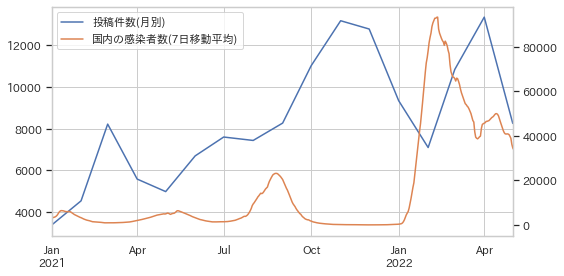

In [28]:
fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# df_all['index'].resample('D').count().rolling(7).mean().plot(ax=ax1, grid=True, c='C0', legend=True, label="投稿件数(7日移動平均)")
df_nhk['国内の感染者数_1日ごとの発表数'].rolling(7).mean().plot(ax=ax2, grid=False, c='C1', legend=False, label="国内の感染者数(7日移動平均)")
df_all['index'].resample('M').count().plot(ax=ax1, grid=True, c='C0', legend=True, label="投稿件数(月別)")
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, facecolor='white', loc='upper left')
ax1.set_xlabel("")

plt.tight_layout()

## 3 クチコミ "rakuten-all-2021-2022" のテキスト分析

### ~~3.1 Ginza + SpaCy インストール~~

In [29]:
# !pip install -U ginza ja_ginza ja_ginza_electra spacy-transformers

In [30]:
# import spacy, ginza
# nlp = spacy.load('ja_ginza')
# # nlp = spacy.load('ja_ginza_electra')
# ginza.set_split_mode(nlp, "C")
# for p in nlp.pipeline:
#     print(p)

# nlp = spacy.load('ja_ginza')
# doc = nlp('望遠鏡で泳いでいる女の子を見た。')
# for sent in doc.sents:
#     for token in sent:
#         print(
#             token.i,
#             token.orth_,
#             token.lemma_,
#             token.norm_,
#             token.morph.get("Reading"),
#             token.pos_,
#             token.morph.get("Inflection"),
#             token.tag_,
#             token.dep_,
#             token.head.i,
#         )
#     print('EOS')
  
# from spacy import displacy
# displacy.render(doc, style="dep", options={"compact":True}, jupyter=True)
# displacy.render(doc, style="ent")

In [31]:
# import spacy, ginza
# # nlp = spacy.load('ja_ginza_electra')
# nlp = spacy.load('ja_ginza')
# ginza.set_split_mode(nlp, "C")
# for p in nlp.pipeline:
#     print(p)

# def ginza_tokenizer(text):
#     with nlp.disable_pipes(["ner", "parser"]):
#         doc = nlp(text)
#         ret = []
#         for token in doc:
#             tags = token.tag_.split('-')
#             # 品詞を選択する
#             if tags[0] not in ['名詞','動詞','形容詞','副詞','形容動詞','未知語']:
#                 continue
#             # 不要語を除去する
#             if tags[0] == '名詞' and tags[1] == '非自立可能':  # 'よう'
#                 continue
#             if tags[0] == '動詞' and tags[1] == '非自立可能':  # 'いる'
#                 continue
#             ret.append(token.lemma_)
#         return ' '.join(ret)

In [32]:
# " ".join(df_all['コメント'][0:100].map(ginza_tokenizer))

### 3.1 MeCab + neologd インストール

In [33]:
!apt-get -q -y install mecab libmecab-dev mecab-ipadic-utf8 file > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!cp /etc/mecabrc /usr/local/etc/mecabrc
!pip install fugashi > /dev/null 

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.


In [34]:
!find /usr -name "mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [35]:
from fugashi import GenericTagger

MECAB_ARGS = "-d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd"
# m = GenericTagger(MECAB_ARGS + " " + "-Owakati")
# m = GenericTagger(MECAB_ARGS + " " + '--node-format="%pS%f[6]\\s" --eos-format="\\n" --unk-format="%m"')
m = GenericTagger(MECAB_ARGS)

text = "私はフック船長が好きです。"

for word in m.parseToNodeList(text):
    print(word.surface, word.feature)

私 ('名詞', '代名詞', '一般', '*', '*', '*', '私', 'ワタシ', 'ワタシ')
は ('助詞', '係助詞', '*', '*', '*', '*', 'は', 'ハ', 'ワ')
フック船長 ('名詞', '固有名詞', '人名', '一般', '*', '*', 'フック船長', 'フックセンチョウ', 'フックセンチョー')
が ('助詞', '格助詞', '一般', '*', '*', '*', 'が', 'ガ', 'ガ')
好き ('名詞', '形容動詞語幹', '*', '*', '*', '*', '好き', 'スキ', 'スキ')
です ('助動詞', '*', '*', '*', '特殊・デス', '基本形', 'です', 'デス', 'デス')
。 ('記号', '句点', '*', '*', '*', '*', '。', '。', '。')


In [36]:
m = GenericTagger(MECAB_ARGS)

def mecab_tokenizer(text):
    ret = []
    for word in m.parseToNodeList(text):
        # 品詞を選択する
        if word.feature[0] not in ['名詞','動詞','形容詞','副詞','形容動詞','未知語']:
            continue
        # 不要語を除去する
        if word.feature[0] == '名詞' and word.feature[1] == '非自立':  # 'よう'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '非自立':  # 'いる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '接尾':    # 'られる'
            continue
        if word.feature[0] == '動詞' and word.feature[1] == '自立' and word.feature[6] in ['ある','する']:
            continue
        ret.append(word.feature[6])
    return ' '.join(ret)

In [37]:
" ".join(df_all['コメント'][0:100].map(mecab_tokenizer))

'6月 １ ６ 日 出張 利用 値段 安い 決める ベッド 寝心地 部屋 清潔感 コンビニ 目 前 何より 受付 女性 対応 親切 印象 値段 得る 家族 的 親切 対応 静か 立地 温泉 リフレッシュ できる 他 天婦羅 等 美味しい 頂く 朝 早め 御飯 ひと言 若い オバアちゃん もっと 接客 改める いい 静か 環境 精神的 癒す 乞い 医方 ピッタリ 宿 源泉 風呂 気持ちいい 宿 内 静か 最高 利用 思う 素泊まり 予約 20時 過ぎる 到着 後 主人 天 ざる 作る 翌日 日曜日 朝 バス 乗る 6時 過ぎ チェックアウト しよう 奥様 わざわざ 宿 前 バス停 行く 休日 運休 確認 さらに 次 バス 待つ あいだ コーヒー * 豪華 設備 求める 方 自信 もつ 推薦 できる 宿 数々 難病 治す 魔法 温泉 体感 すごい いつまでも ポカポカ これ 凄い 温泉 食事 豪華 素晴らしい cospa すごい オーナー 夫妻 素晴らしい サービス 極上 オススメ 民宿 蕎麦屋 さん 居酒屋 やる 食事 特に 期待 低価格 宿泊 料金 おいしい 料理 満足 山 宿 お刺身 出る そば屋 さん 出汁 使い方 上手 思う ホッケ フライ 新鮮 ホッケ 下処理 しっかり 骨 １ 本 たまたま しれる ビックリ 中身 ふわふわ 衣 サクサク カリカリ 素晴らしい さ 天ぷら おいしい 温泉 熱 め お湯 窓 開ける クールダウン できる 十分 シャワー 男女 それぞれ 3つ シャワー 出 良い さ そう 場所 試す 使う 良い 後で 気づく 野 観光 ホテル なる 民宿 存在 貴重 マスター 奥様 丁寧 白 ワンちゃん ちょっと 寒い 朝晩 外 がんばる 出迎える 今回 特に コロナ 密 避ける リーズナブル 宿泊 民宿 選ぶ 大正解 利用 思う 静か 大変 よい 伊達 宿泊 一択 客室 とても 広い ツイン 部屋 窓 隣 部屋 窓 向かい合う なる 外 景色 見える 部屋 とても 広い バス ルーム 立派 昔 老舗 ホテル 雰囲気 空調設備 老朽 化 風量 さげる 音 うるさい 安眠 妨げ なる 料金 格安 仕方 有馬線 部屋 雰囲気 良い とても 惜しい 喫煙室 選ぶ 部屋 ひどい 古い ホテル 利用 多い 清潔感 ない 幻滅 壁紙 古い シミ だらけ セ

In [38]:
df_all['mecab'] = df_all['コメント'].map(mecab_tokenizer)
df_all['length'] = df_all['mecab'].map(lambda x: x.split()).map(len)
print(df_all.shape)
df_all.head()

(142456, 21)


,カテゴリー,エリア,施設番号,施設名,コメント,総合,サービス,立地,部屋,設備・アメニティ,...,食事,旅行の目的,同伴者,投稿者,年代,性別,投稿回数,index,mecab,length
宿泊年月,,,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00+09:00,A_レジャー,01_登別,104803,伊達ビジネスホテル キャッスル,６月１６日に出張で利用しました。値段が安いので決めましたが、ベッドの寝心地、部屋の清潔感、コ...,4,5,5,5,5,...,-,ビジネス,一人,ブー0605,50代,男性,na,0,6月 １ ６ 日 出張 利用 値段 安い 決める ベッド 寝心地 部屋 清潔感 コンビニ 目...,24
2021-07-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,家族的な親切な対応をして頂きました。,4,5,4,3,3,...,3,レジャー,一人,旅好き1720,70代,男性,na,1,家族 的 親切 対応,4
2021-03-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな立地と温泉でリフレッシュできました。他、天婦羅等美味しく頂きました。,4,3,4,4,2,...,4,レジャー,一人,投稿者,na,na,na,2,静か 立地 温泉 リフレッシュ できる 他 天婦羅 等 美味しい 頂く,10
2021-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,朝早めの御飯ありがとうございました。ひと言、若いほうのおばあちゃんもっと接客改めた方がいいよ...,3,2,4,3,3,...,2,レジャー,一人,トッチ8199,60代,男性,na,3,朝 早め 御飯 ひと言 若い オバアちゃん もっと 接客 改める いい,10
2022-04-01 00:00:00+09:00,A_レジャー,01_登別,106028,蟠渓温泉 湯人家,静かな環境で精神的癒しを乞いたい方にピッタリな宿です。源泉の風呂は気持ちいいし、宿内も静かで...,4,4,5,4,4,...,-,レジャー,友達,投稿者,na,na,na,4,静か 環境 精神的 癒す 乞い 医方 ピッタリ 宿 源泉 風呂 気持ちいい 宿 内 静か 最...,17


In [39]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(max_df=0.5, min_df=1, max_features=500)
bag = count.fit_transform(df_all['mecab'].values)
feature_names = count.get_feature_names()
feature_names[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1つ', '1人', '1階', '2人', 'bathtab', 'cospa', 'fi', 'jr', 'usj', 'wi']

In [40]:
tf = bag.toarray().sum(axis=0)
for i in tf.argsort()[:-10:-1]:
    print(tf[i], "\t", count.get_feature_names()[i])

66132 	 部屋
64061 	 良い
56000 	 利用
52281 	 思う
48407 	 とても
44305 	 ホテル
34334 	 できる
33998 	 なる
33817 	 宿泊


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
df_count = pd.DataFrame(bag.toarray())
df_count.columns = feature_names
print(df_count.shape)
df_count.head()

(142456, 500)


,1つ,1人,1階,2人,bathtab,cospa,fi,jr,usj,wi,...,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


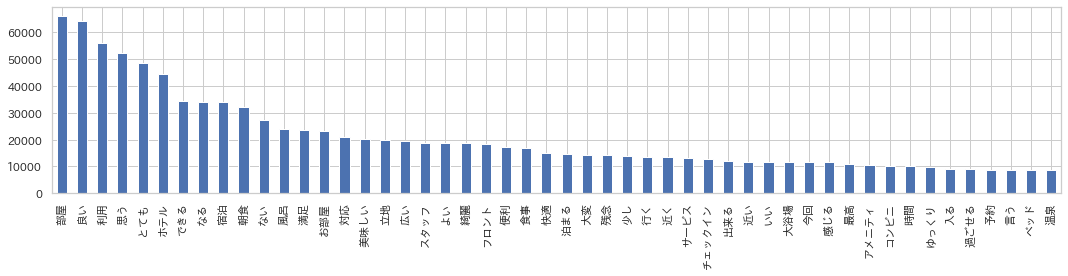

In [42]:
df_count.sum(axis=0).sort_values(ascending=False)[0:50].plot.bar(figsize=(15, 4), grid=True)
plt.tight_layout()

In [43]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_vectorizer = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
tfidf = tfidf_vectorizer.fit_transform(bag)

In [44]:
df_tfidf = pd.DataFrame(tfidf.toarray())
df_tfidf.columns = feature_names
print(df_tfidf.shape)
df_tfidf.head()

(142456, 500)


,1つ,1人,1階,2人,bathtab,cospa,fi,jr,usj,wi,...,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.2 可視化

#### Word Cloud

In [45]:
topic = bag.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

66132 	 部屋
64061 	 良い
56000 	 利用
52281 	 思う
48407 	 とても
44305 	 ホテル
34334 	 できる
33998 	 なる
33817 	 宿泊


In [46]:
topic = tfidf.toarray().sum(axis=0)
for i in topic.argsort()[:-10:-1]:
    print(topic[i], "\t", feature_names[i])

9043.037912856204 	 良い
8022.543368192652 	 部屋
7933.102996925138 	 利用
7082.98030605359 	 とても
6219.165602262642 	 思う
6034.679767478156 	 ホテル
5162.590314819363 	 朝食
5139.948548043241 	 宿泊
4970.013698363547 	 できる


In [47]:
font_path = !find / -name "*.ttf" 2> /dev/null | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

良い,部屋,利用,とても,思う,ホテル,朝食,宿泊,できる,満足,なる,綺麗,便利,よい,風呂,立地,ない,お部屋,対応,美味しい


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


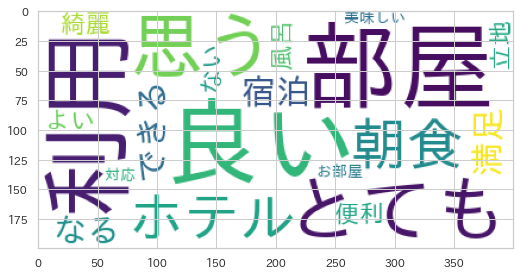

In [48]:
from wordcloud import WordCloud

fig = plt.figure(figsize=(8,4))
words = count.get_feature_names()
n_top_words = 20

long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
print(long_string)

wordcloud = WordCloud(font_path=font_path[0], background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
plt.imshow(wordcloud)

plt.tight_layout()

#### 対応分析

In [49]:
df_all[['index', 'カテゴリー', 'エリア']].head()

,index,カテゴリー,エリア
宿泊年月,,,
2021-06-01 00:00:00+09:00,0,A_レジャー,01_登別
2021-07-01 00:00:00+09:00,1,A_レジャー,01_登別
2021-03-01 00:00:00+09:00,2,A_レジャー,01_登別
2021-04-01 00:00:00+09:00,3,A_レジャー,01_登別
2022-04-01 00:00:00+09:00,4,A_レジャー,01_登別


In [50]:
df_merge = pd.merge(df_all[['index', 'カテゴリー', 'エリア']], df_count, left_on='index', how='inner', right_index=True)
print(df_merge.shape)
df_merge.head()

(142456, 503)


,index,カテゴリー,エリア,1つ,1人,1階,2人,bathtab,cospa,fi,...,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
宿泊年月,,,,,,,,,,,,,,,,,,,,,
2021-06-01 00:00:00+09:00,0,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-07-01 00:00:00+09:00,1,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-03-01 00:00:00+09:00,2,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-04-01 00:00:00+09:00,3,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-04-01 00:00:00+09:00,4,A_レジャー,01_登別,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df_period2 = df_merge.groupby(["エリア"]).sum()
df_period2.drop('index', axis=1, inplace=True)
df_period2.head()

,1つ,1人,1階,2人,bathtab,cospa,fi,jr,usj,wi,...,食べる,食事,飲み物,飲む,飲食店,館内,駐車場,驚く,高い,髪の毛
エリア,,,,,,,,,,,,,,,,,,,,,
01_登別,20,22,7,30,6,41,11,11,0,11,...,296,905,30,27,8,88,92,39,76,24
02_草津,47,36,15,71,0,78,17,1,0,17,...,448,1561,48,77,18,202,199,58,130,23
03_箱根,131,162,40,243,15,170,89,0,0,89,...,1200,4669,218,234,25,474,338,182,411,59
04_道後,33,44,24,62,18,131,38,69,0,38,...,408,1148,45,79,58,134,459,51,152,20
05_湯布院,31,35,6,59,1,31,19,5,0,19,...,273,1088,35,58,4,47,71,33,83,7


In [52]:
!pip install mca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6025 sha256=050cc0b978d5552995fa699d1c09b83bfdbf7dfe217137cea699b453ccf9ba76
  Stored in directory: /root/.cache/pip/wheels/00/46/2a/acfca530ddd1e1d72271e07cb7517611d10cd6bcd05cd0cf34
Successfully built mca


In [53]:
import mca
ncols = df_period2.shape[1]
mca_ben = mca.MCA(df_period2, ncols=ncols, benzecri=False)
mca_ben.fs_r(N=2)

array([[-0.4488124 ,  0.09055266],
       [-0.62104422, -0.54816334],
       [-0.54197688,  0.1538997 ],
       [-0.22862493,  0.06066732],
       [-0.65178662,  0.1848941 ],
       [ 0.09720893, -0.00430464],
       [ 0.14088088, -0.01866854],
       [ 0.14205917,  0.00863033],
       [ 0.12937828, -0.01550857],
       [ 0.12495166, -0.01237254]])

In [54]:
result_row = pd.DataFrame(mca_ben.fs_r(N=2))
result_row.index = list(df_period2.index)
result_row

,0,1
01_登別,-0.448812,0.090553
02_草津,-0.621044,-0.548163
03_箱根,-0.541977,0.153900
04_道後,-0.228625,0.060667
05_湯布院,-0.651787,0.184894
06_札幌,0.097209,-0.004305
07_名古屋,0.140881,-0.018669
08_東京,0.142059,0.008630
09_大阪,0.129378,-0.015509
10_福岡,0.124952,-0.012373


In [55]:
result_col = pd.DataFrame(mca_ben.fs_c(N=2))
result_col.index = list(df_period2.columns)
result_col

,0,1
1つ,-0.024230,-0.002707
1人,-0.004988,0.069644
1階,0.334275,-0.018861
2人,-0.218666,0.054765
bathtab,0.449924,0.001388
...,...,...
館内,-0.329570,-0.053761
駐車場,0.018351,-0.065131
驚く,-0.065320,0.028489
高い,0.027599,0.019762


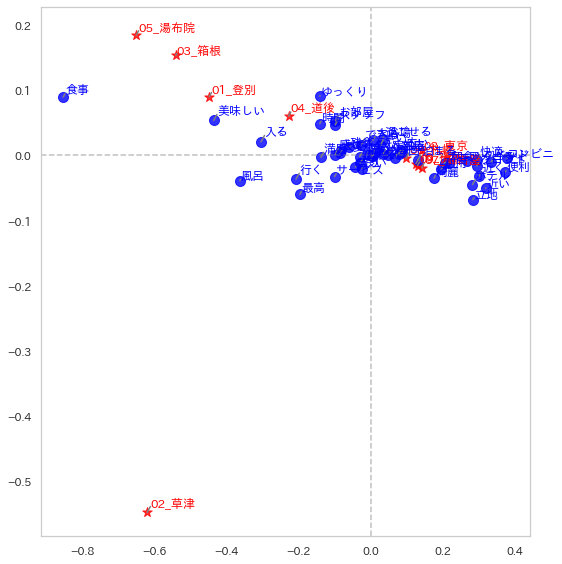

In [56]:
import random

plt.figure(figsize=(8,8))

tf = bag.toarray().sum(axis=0)
top_tf = tf.argsort()[:-50:-1]

# 行方向のプロット (外部変数)
plt.scatter(result_row[0], result_row[1], s=100, marker="*", c="red", alpha=0.8)
for i in range(result_row.shape[0]):
    r = random.random() * 0.01
    plt.text(result_row.iloc[i, 0]+r, result_row.iloc[i, 1]+r, result_row.index[i], c="red")
    plt.plot([result_row.iloc[i, 0]+r, result_row.iloc[i, 0]], [result_row.iloc[i, 1]+r, result_row.iloc[i, 1]], c="gray")

# 列方向のプロット (単語)
plt.scatter(result_col.iloc[top_tf, 0], result_col.iloc[top_tf, 1], s=100, marker="o", c="blue", alpha=0.8)
for i in top_tf:
    r = random.random() * 0.01
    plt.text(result_col.iloc[i, 0]+r, result_col.iloc[i, 1]+r, result_col.index[i], c="blue")
    plt.plot([result_col.iloc[i, 0]+r, result_col.iloc[i, 0]], [result_col.iloc[i, 1]+r, result_col.iloc[i, 1]], c="gray")

plt.axhline(0, c="gray", ls='--', alpha=0.5)
plt.axvline(0, c="gray", ls='--', alpha=0.5)
plt.grid(False)
plt.tight_layout()

#### 共起ネットワーク

In [57]:
n_top_words = 50
top_tf = tf.argsort()[:-n_top_words:-1]
top_tf

array([472, 430, 211, 291,  66, 144,  64,  73, 263, 332,  71, 489, 380,
        31, 267, 422, 413, 277, 115,  92, 419, 140, 186, 491, 290, 361,
       248, 351, 270, 439, 457, 111, 124, 208, 456,  14, 249, 170, 295,
       327,  96, 108, 319,  90, 192, 465, 167, 445, 143])

In [58]:
df_nodes = pd.DataFrame({'label': [feature_names[i] for i in top_tf], 'freq': tf[top_tf]})
df_nodes.head()

,label,freq
0,部屋,66132
1,良い,64061
2,利用,56000
3,思う,52281
4,とても,48407


In [59]:
from itertools import combinations
pairs = list(combinations(top_tf, 2))

min_col = 1000
left, right, freq = [], [], []
for p in pairs:
    df = df_count[(df_count.iloc[:, list(p)] > 0).all(axis=1)].shape[0]
    if df > min_col:
        left.append(feature_names[p[0]])    
        right.append(feature_names[p[1]])
        freq.append(df)

df_edges = pd.DataFrame({'left': left, 'right': right, 'freq': freq})
df_edges.head()

,left,right,freq
0,部屋,良い,19155
1,部屋,利用,15371
2,部屋,思う,17039
3,部屋,とても,13601
4,部屋,ホテル,12834


Louvain Modularity:  0.01834253428034865


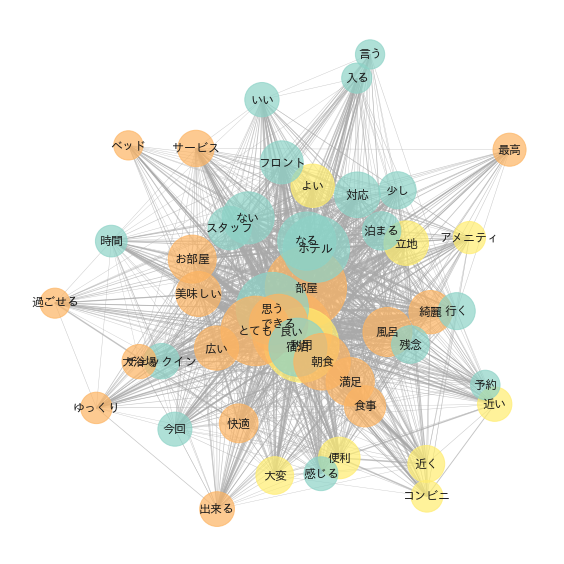

In [60]:
import networkx as nx
import community.community_louvain

G = nx.Graph()
G.add_nodes_from(df_nodes['label'])
G.add_weighted_edges_from(df_edges.values)

plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.5)
part = community.community_louvain.best_partition(G)
print("Louvain Modularity: ", community.community_louvain.modularity(part, G))
size = float(len(set(part.values())))

# 孤立した node を削除
isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
for n in isolated:
    G.remove_node(n)

node_size = df_nodes['freq'] / 10
node_class = [part.get(node) for node in G.nodes()]
edge_width = [d["weight"] / 3000 for (u, v, d) in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, alpha=0.7, cmap=plt.get_cmap("Set3_r"), node_size=node_size, node_color=node_class)
nx.draw_networkx_edges(G, pos, alpha=0.7, edge_color="darkgrey", width=edge_width)
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_weight="bold")

plt.axis('off')
plt.tight_layout()

In [61]:
(node_size.shape)

(49,)

### 3.3 カテゴリーごとの分析

#### 頻出語リスト

In [62]:
df_count_1 = df_count.iloc[df_all[df_all['カテゴリー'] == "A_レジャー"]['index']]
df_count_2 = df_count.iloc[df_all[df_all['カテゴリー'] == "B_ビジネス"]['index']]

dc_list = [df_count_1, df_count_2]

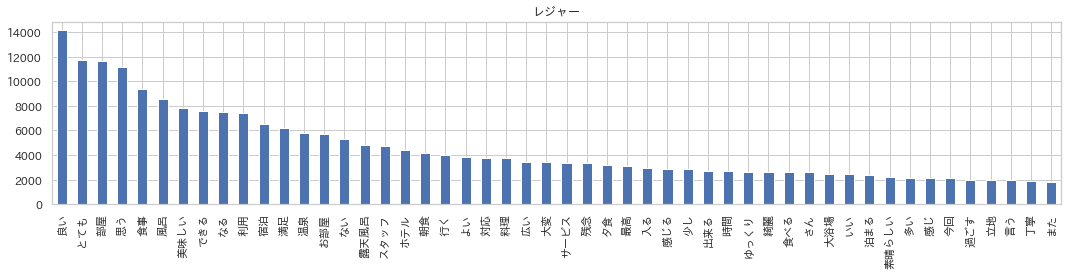

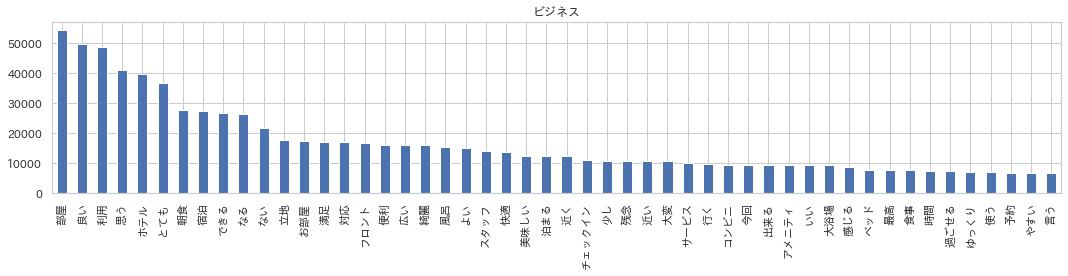

In [63]:
n_top_words = 50

for i, dc in enumerate(dc_list):
    dc.sum(axis=0).sort_values(ascending=False)[0:n_top_words].plot.bar(figsize=(15, 4), grid=True)
    plt.title(["レジャー", "ビジネス"][i])
    plt.tight_layout()
    plt.show()

#### トピックモデル

In [64]:
df_tfidf_1 = df_tfidf.iloc[df_all[df_all['カテゴリー'] == "A_レジャー"]['index']]
df_tfidf_2 = df_tfidf.iloc[df_all[df_all['カテゴリー'] == "B_ビジネス"]['index']]

dt_list = [df_tfidf_1, df_tfidf_2]

In [65]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

font_path = !find / -name "*.ttf" 2> /dev/null | grep -s "ipaexg.ttf" | head -n 1
font_path

['/usr/local/lib/python3.7/dist-packages/japanize_matplotlib/fonts/ipaexg.ttf']

In [66]:
def plot_lda(tfidf, n_top_words):

    lda = LDA(max_iter=25, learning_method='batch', random_state=0, n_jobs=-1, n_components=4)
    lda.fit(tfidf)

    words = count.get_feature_names()

    fig = plt.figure(figsize=(15,8))

    for topic_idx, topic in enumerate(lda.components_):
        print("\nTopic #", topic_idx, ":")
        long_string = ','.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(long_string)

        ax = fig.add_subplot(2, 2, topic_idx + 1)
        wordcloud = WordCloud(font_path=font_path[0], background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
        wordcloud.generate(long_string)
        ax.imshow(wordcloud)
        ax.set_title('Topic '+str(topic_idx))

    plt.tight_layout()
    plt.show()

レジャー


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic # 0 :
思う,食事,ない,なる,良い,部屋,夕食,残念,子供,食べる,対応,料理,風呂,宿泊,言う,時間,チェックイン,スタッフ,美味しい,とても,できる,朝食,フロント,行く,ホテル,予約,利用,入る,温泉,感じる,少し,案内,いる,満足,サービス,多い,いい,駐車場,無い,説明,出る,バイキング,さん,お部屋,欲しい,コロナ,置く,用意,よい,感じ,わかる,悪い,大変,持つ,期待,到着,出す,チェックアウト,今回,嬉しい,入れる,少ない,見る,プラン,そう,それ,早い,来る,助かる,大浴場,内容,いただける,女性,遅い,電話,事前,露天風呂,出来る,お願い,聞く,こちら,メニュー,泊まる,あと,もう少し,ご飯,書く,分かる,ほしい,すぐ,子ども,ちょっと,タオル,しれる,もう,確認,丁寧,楽しみ,これ,荷物,自分,かなり,最後,口コミ,初めて,特に,評価,印象,あまり,取る,ありがたい,対策,提供,違う,改善,いただく,大人,いう,家族,布団,接客,コロナ禍,頂く,飲む,旅館,飲み物,場所,使う,もっと,連絡,当日,料金,仕方,アメニティ,伝える,旅行,レストラン,広い,テーブル,必要,男性,会場,受付,従業員,無料,混む,待つ,最初,高い,普通,小さい,気持ち,ゆっくり,つく,通り,コーヒー,かかる,子供達,着く,行う,ドリンク,全体的,一つ,考える,種類,1人,ロビー,変わる,頂ける,変更,写真,値段,驚く,以前,エレベーター,すごい,帰る,つける,使える,かける,色々,安心,そこ,楽しめる,館内,本当に,冷蔵庫,頑張る,付き,非常,にくい,追加,清掃,配慮,お茶,好き,選ぶ,1つ,問題,素晴らしい,空く,施設,どう,入浴,fi,wi,おいしい,忘れる,使用,不満,落ちる,椅子,ビュッフェ,どこ,ここ,しっかり,準備,品数,まず,バス,希望,やすい,知る,見える,何度,選べる,戻る,翌日,混雑,状態,移動,気分,予定,歩く,なかなか,注意,楽しむ,掃除,状況,全区,全て,お湯,一人,貸切,立地,楽しい,全く,まだ,スリッパ,親切,きちんと,びっくり,不安,たくさん,選択,金額,喜ぶ,スムーズ,困る,変える,付く,綺麗,づらい,レベル,狭い,心配,沢山,また,近く,思える,今後,2人,セット,ほぼ,いく,大きい,温度,どれ,行き届く,前回,皆

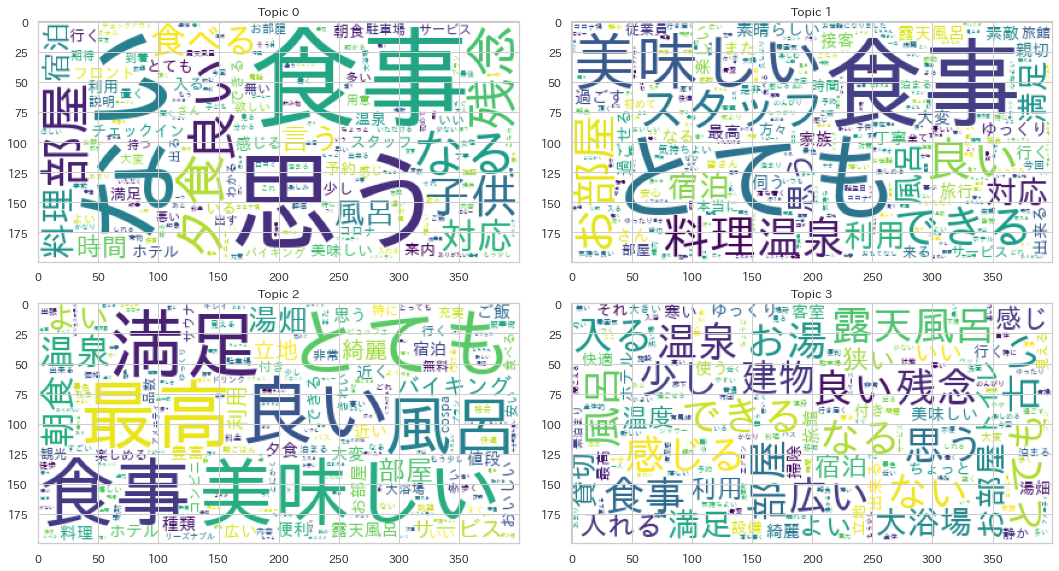

ビジネス


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Topic # 0 :
チェックイン,ホテル,利用,思う,宿泊,なる,できる,対応,フロント,時間,部屋,予約,朝食,チェックアウト,スタッフ,とても,良い,ない,今回,お部屋,行く,プラン,助かる,出来る,残念,コロナ,言う,こちら,泊まる,お願い,荷物,大変,サービス,丁寧,早い,嬉しい,さん,遅い,子供,いる,案内,いただける,女性,ゆっくり,アメニティ,安心,美味しい,駐車場,いい,満足,説明,少し,食事,感じる,食べる,見る,エレベーター,来る,初めて,対策,電話,入る,大浴場,スムーズ,用意,よい,持つ,確認,コロナ禍,本当に,出る,入れる,レストラン,変更,そう,予定,当日,素晴らしい,到着,頂く,ありがたい,すぐ,取る,素敵,多い,無い,受付,頂ける,翌日,親切,いただく,しっかり,清掃,聞く,それ,わかる,かかる,風呂,次回,感じ,感謝,気分,のんびり,家族,仕事,滞在,混雑,過ごす,楽しい,置く,前回,以前,ラウンジ,無料,気持ち,見える,混む,必要,預かる,接客,男性,自分,コーヒー,事前,空く,欲しい,状況,もう,ロビー,悪い,連絡,いつも,これ,使う,wi,fi,usj,旅行,楽しみ,フロア,変わる,分かる,笑顔,ここ,非常,過ごせる,印象,帰る,戻る,機会,待つ,お世話になりました,行う,喜ぶ,ほしい,書く,楽しむ,いう,違う,選ぶ,追加,タオル,付き,また,広い,使用,さる,かなり,忘れる,誕生日,深夜,提供,綺麗,少ない,着く,あと,探す,頑張る,料金,今後,迷う,色々,使える,改善,伝える,有難い,気持ちよい,知る,お世話,是非,子ども,買う,特に,従業員,方々,準備,通り,全て,すごい,希望,かける,しれる,飲む,行ける,場所,配慮,期待,感動,可能,どこ,好き,大阪,快適,ちょっと,泊まり,近く,温泉,館内,皆さん,2人,立地,あまり,楽しめる,ぜひ,料理,景色,早朝,よく,時期,一泊,友人,きちんと,困る,やすい,もう少し,問題,東京,一つ,子供達,何度,移動,一人,久しぶり,心配,雰囲気,1人,不安,ずっと,仕方,なかなか,夕食,場合,客室,伺う,ツイン,電車,状態,会場,出す,落ち着く,どう,最初,上がる,評価,毎回,ドリンク,夜景,いく,驚く,掃除,考える,写真,口コミ,内容,注意,優しい,もっと,お茶,たくさん,そこ

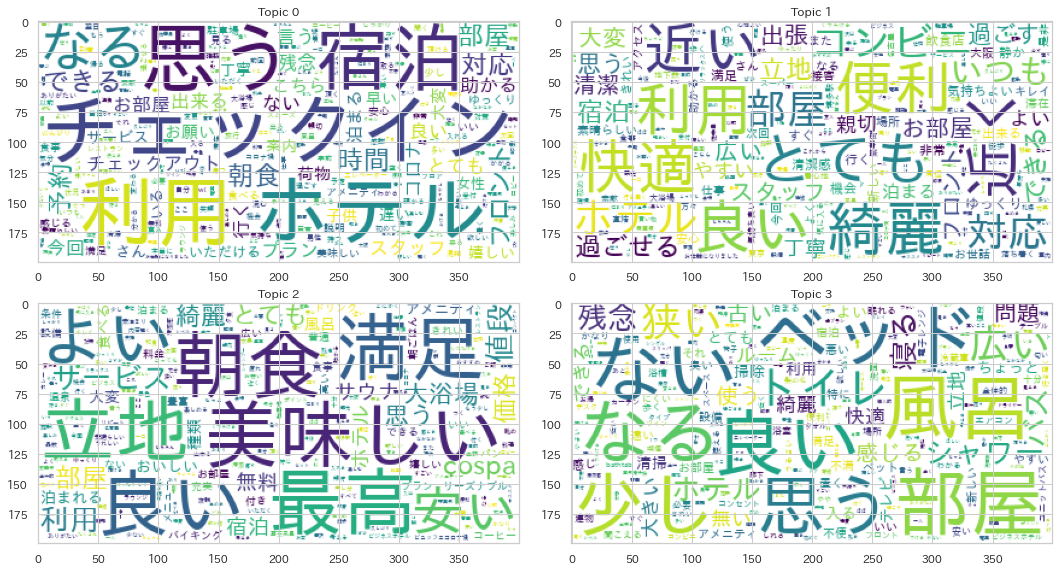

In [67]:
n_top_words = 500

for i, dt in enumerate(dt_list):
    print(["レジャー", "ビジネス"][i])
    plot_lda(dt, n_top_words)